# Classification Model Using Naive Bayes Algorithm

The objective is to recognize a plant based on description of its leaves.

## Step 1: Load the libraries 

In [1]:
# pandas for data pre-processing
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

# sklearn for machine learning
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

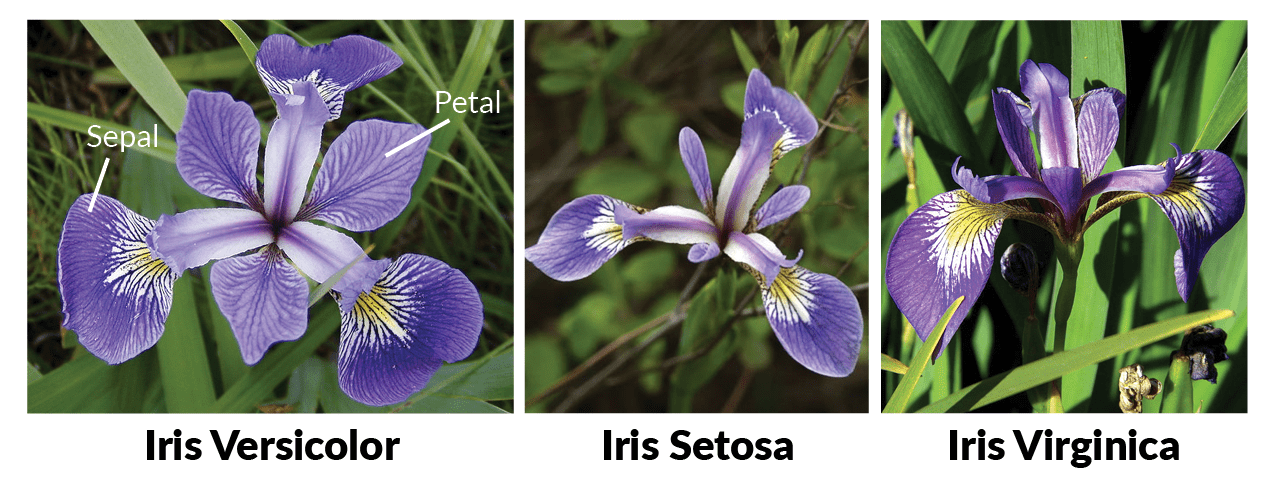

## Step 2: Load a Dataset

Use __pandas__ to load the data from a file or from a data sets repository.<br>
It is a table data, stored in csv format.<br>
Columns contain the size of the leaves of various iris flowers. <br>
Specify the names of each column before loading the data.<br>
Create a dataset object.

In [2]:
# Load dataset from Internet
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

## Step 3: Get to Know Your Data

Investigate the dataset. <br>
Find out how many records are available, all they all clean, how many classes they represent. <br>
Create diagrams to visualize the set and its descriptive statistics.

In [3]:
# See the shape and size 
dataset.shape

(150, 5)

In [4]:
# See how it looks (get the first 20 records)
dataset.sample(10)

,sepal-length,sepal-width,petal-length,petal-width,class
130,7.4,2.8,6.1,1.9,Iris-virginica
74,6.4,2.9,4.3,1.3,Iris-versicolor
145,6.7,3.0,5.2,2.3,Iris-virginica
35,5.0,3.2,1.2,0.2,Iris-setosa
80,5.5,2.4,3.8,1.1,Iris-versicolor
37,4.9,3.1,1.5,0.1,Iris-setosa
17,5.1,3.5,1.4,0.3,Iris-setosa
88,5.6,3.0,4.1,1.3,Iris-versicolor
76,6.8,2.8,4.8,1.4,Iris-versicolor
27,5.2,3.5,1.5,0.2,Iris-setosa


In [5]:
# See how many classes are included and how the records per class are distributed
# Group by class attribute
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [6]:
# Have the descriptive statistics calculated for the whole dataset
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Visualize the Dataset Statistics
    1. Draw Box-Whisker Plots
    2. Draw Histograms
    3. Draw Multivariate Plots

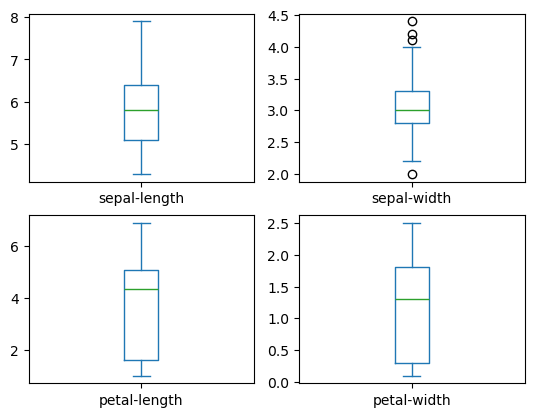

In [7]:
# Draw box-whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

See explanation of the box-whisker diagram

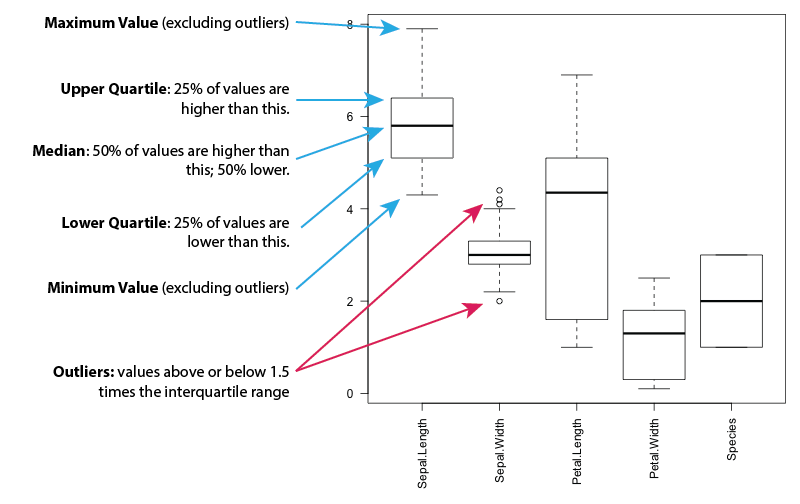

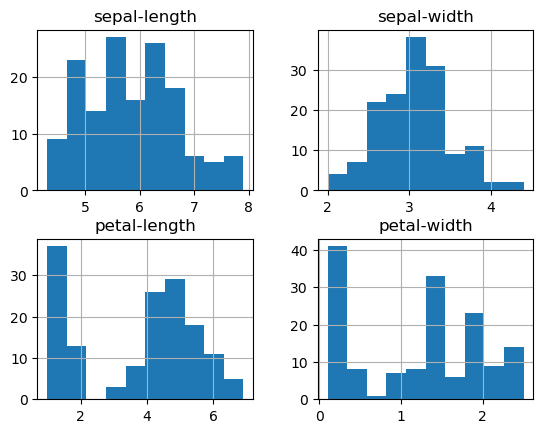

In [8]:
# Draw histograms
dataset.hist()
plt.show()

These diagrams show the distribution of the values in the columns. <br>
Two of them seem to have Normal (Gaussian) distribution.<br> 
It is good to know, as we can later choose appropriate algorithms for exploitation.

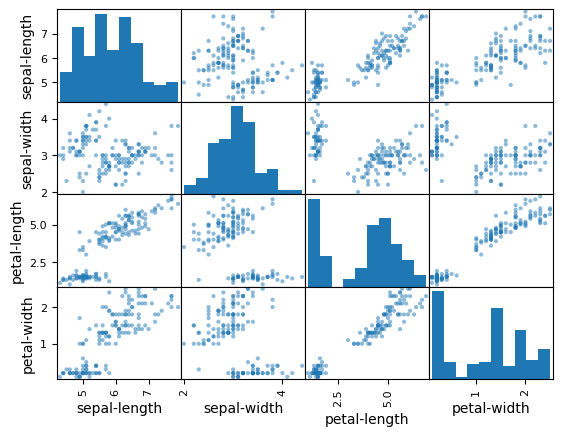

In [9]:
# Draw Multivariate Plots - scatterplots 
# These plots show the observed correlation between the attributes
scatter_matrix(dataset)
plt.show()

It can be helpful to find out structured relationships between input variables.
He we can spot some linear relationships.

## Step 4: Training
Now let's try to train a model.
1. Divide the dataset into two: training set and test set
2. Implement Bayes algorithm for training with the training sub-set
3. Estimate how accurate is the model with the test sub-set

In [10]:
# Split the dataset into two: 
#   80% of it as training data
#   20% as a validation dataset

# Convert the dataset into array
array = dataset.values
# Create two (sub) arrays from it
X = array[:,0:4] # data without class
Y = array[:,4]   # just class

In [11]:
# Let Python split the set into four, we tell the proportion of splitting
test_set_size = 0.2

# Initial value for randomization
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=test_set_size, random_state=seed)


In [12]:
print(X_test, Y_test)

[[5.9 3.0 5.1 1.8]
 [5.4 3.0 4.5 1.5]
 [5.0 3.5 1.3 0.3]
 [5.6 3.0 4.5 1.5]
 [4.9 2.5 4.5 1.7]
 [4.5 2.3 1.3 0.3]
 [6.9 3.1 4.9 1.5]
 [5.6 2.7 4.2 1.3]
 [4.8 3.4 1.6 0.2]
 [6.4 3.2 4.5 1.5]
 [6.7 3.0 5.0 1.7]
 [6.0 3.4 4.5 1.6]
 [5.2 4.1 1.5 0.1]
 [7.2 3.6 6.1 2.5]
 [5.2 3.4 1.4 0.2]
 [5.9 3.2 4.8 1.8]
 [6.7 2.5 5.8 1.8]
 [6.4 3.1 5.5 1.8]
 [5.1 3.8 1.6 0.2]
 [4.9 3.1 1.5 0.1]
 [5.8 2.7 3.9 1.2]
 [6.9 3.2 5.7 2.3]
 [6.1 2.9 4.7 1.4]
 [6.0 2.2 5.0 1.5]
 [7.2 3.0 5.8 1.6]
 [6.0 3.0 4.8 1.8]
 [6.2 2.9 4.3 1.3]
 [5.5 2.4 3.8 1.1]
 [5.8 2.7 5.1 1.9]
 [6.7 3.1 5.6 2.4]] ['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-vi

We are ready to apply algorithms for training a model from our data.
We try __Gaussian Naive Bayes (NB)__, as it is appropriate for analysis of numeric data.

In [14]:
# build the model from the train
model = GaussianNB()

In [15]:
model.fit(X_train, Y_train)

GaussianNB()

In [16]:
# test the model on the test set
model.score(X_test, Y_test)

0.8333333333333334

In [18]:
model.score(X_train, Y_train)

0.9833333333333333

## Step 5: Validating the Model

Now we can try the model on our validation set.

In [ ]:
X_test

In [19]:
# Test on the test data, try prediction
predicted = model.predict(X_test)

In [20]:
predicted.shape

(30,)

In [22]:
predicted

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica'], dtype='<U15')

In [23]:
Y_test

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica'], dtype=object)

### Estimate the Accuracy

We need a metrics for the evaluation. <br>
The ‘accuracy‘ is the percentage [%] of correctly predicted instances from the total number of instances in the dataset.

In [24]:
# Set the metrics
scoring = 'accuracy'

In [25]:
# Calculated accuracy of the model over the validation set
print(accuracy_score(Y_test, predicted))

0.8333333333333334


#### Confusion Matrix

Confusion matrix provides an indication of the __three types of predictions__: 
- correct 
- false positive
- false negative.

There are four coeficients, calculated out of these types:
Precission, Recall, Accuracy, and F1 - a harmonic mean of Precission and Recall.

In [26]:
# Classification report provides a breakdown of each class by precision, recall, f1-score and support
cmat = confusion_matrix(Y_test, predicted)
print(cmat)
print(classification_report(Y_test, predicted))

[[7 0 0]
 [0 9 3]
 [0 2 9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.82      0.75      0.78        12
 Iris-virginica       0.75      0.82      0.78        11

       accuracy                           0.83        30
      macro avg       0.86      0.86      0.86        30
   weighted avg       0.84      0.83      0.83        30



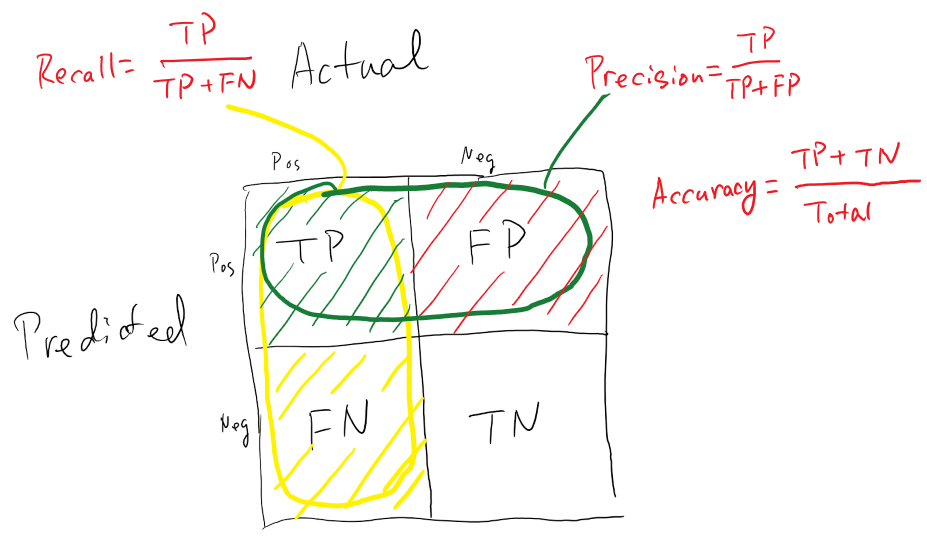

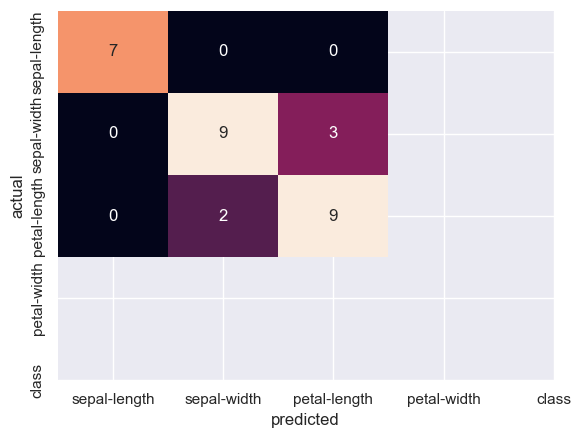

In [27]:
# visualize the confusion matrix by use of seaborn library
import seaborn as sns
sns.set()
sns.heatmap(cmat, square=False, annot=True, cbar=False,
            xticklabels=names, yticklabels=names)
plt.ylabel('actual')
plt.xlabel('predicted');
plt.show()

In [28]:
# Evaluate classifier performance
from sklearn.metrics import classification_report
class_names = ['virginia', 'serosa', 'versicolor']
print("\n" + "#"*40)

print("\nClassifier performance on training dataset\n")
print(classification_report(Y_train, model.predict(X_train), target_names=class_names))
print("#"*40 + "\n")

print("\nClassifier performance on test dataset\n")
print(classification_report(Y_test, predicted, target_names=class_names))


########################################

Classifier performance on training dataset

              precision    recall  f1-score   support

    virginia       1.00      1.00      1.00        43
      serosa       0.95      1.00      0.97        38
  versicolor       1.00      0.95      0.97        39

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120

########################################


Classifier performance on test dataset

              precision    recall  f1-score   support

    virginia       1.00      1.00      1.00         7
      serosa       0.82      0.75      0.78        12
  versicolor       0.75      0.82      0.78        11

    accuracy                           0.83        30
   macro avg       0.86      0.86      0.86        30
weighted avg       0.84      0.83      0.83        30



In [ ]:
Y_test

### Validation with Random Data Samples

In [32]:
# m = array[[[5] [3] [1] [0]]]
k = [[6.7, 3.1, 5.6, 2.4]]
m = [[5.4, 3.0, 4.5, 1.5]] 
# my_prediction = model.predict(k)
my_prediction = model.predict(m)
my_prediction

array(['Iris-versicolor'], dtype='<U15')

Try to improve the model. Save the final version in a file for future use.